In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from model.data import ConventionCenter
from model.visualization import plot_floor_plan

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import squareform

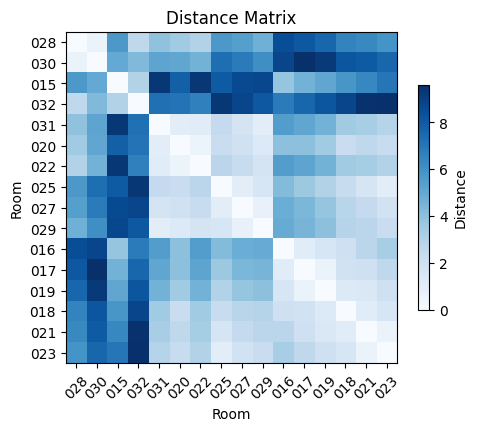

In [3]:
distance_data = ConventionCenter.generate().distance_map

nodes = sorted(
    set(
        [key[0] for key in distance_data.keys()]
        + [key[1] for key in distance_data.keys()]
    )
)
n = len(nodes)

# Create initial node to index mapping
node_to_idx = {node: i for i, node in enumerate(nodes)}

# Initialize matrix with zeros
initial_matrix = np.zeros((n, n))

# Fill the matrix with distance values
for (node1, node2), distance in distance_data.items():
    i, j = node_to_idx[node1], node_to_idx[node2]
    initial_matrix[i, j] = distance
    initial_matrix[j, i] = distance  # Make symmetric

# Fill diagonal with zeros (distance from node to itself)
np.fill_diagonal(initial_matrix, 0)

# Use hierarchical clustering to reorder nodes
condensed_dist = squareform(initial_matrix)
linkage_matrix = linkage(condensed_dist, method="ward")
cluster_order = leaves_list(linkage_matrix)

# Reorder nodes and matrix based on clustering
sorted_nodes = [nodes[i] for i in cluster_order]
matrix = initial_matrix[cluster_order][:, cluster_order]

# Create the plot
plt.figure(figsize=(5, 5))
im = plt.imshow(matrix, cmap="Blues", interpolation="nearest")

# Add colorbar
plt.colorbar(im, label="Distance", shrink=0.5)

# Set ticks and labels with sorted nodes
plt.xticks(range(n), sorted_nodes, rotation=45)
plt.yticks(range(n), sorted_nodes)

# Add labels and title
plt.xlabel("Room")
plt.ylabel("Room")
plt.title("Distance Matrix")

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.savefig("dist.pdf", bbox_inches="tight")

/Users/david/work/qce-qaoa-tutorial/src/model/visualization.py:89: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(


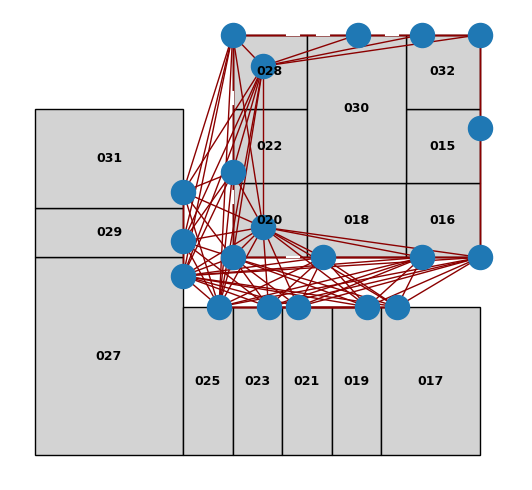

In [4]:
c = ConventionCenter.generate()

fig, ax = plot_floor_plan(c)

c.draw(ax)